In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

%matplotlib inline
%pylab inline

pylab.rcParams['figure.figsize'] = (10, 5)
df1 = pd.read_csv("UniqueSender.csv",
                  sep='\t', encoding='latin1',
                  index_col = 'NumberOfUniqueSenders')

print(df1)

Populating the interactive namespace from numpy and matplotlib
                       NumberOfUsers
NumberOfUniqueSenders               
1                           36346100
2                           10519246
3                            6907419
4                            5101209
5                            3885409
6                            2977558
7                            2313368
8                            1808318
9                            1424813
10                           1126542
11                            894981
12                            714650
13                            572824
14                            462064
15                            373606
16                            304231
17                            248725
18                            204659
19                            168494
20                            139271
21                            115623
22                             96463
23                             80873
24          

`%matplotlib` prevents importing * from pylab and numpy


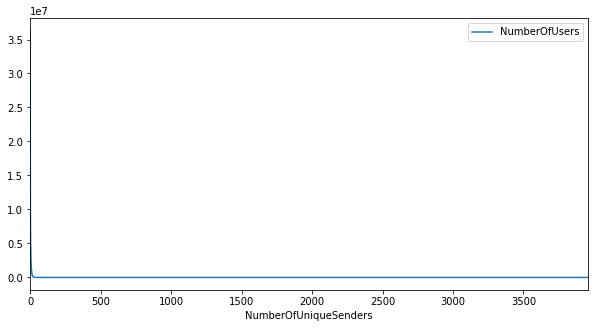

In [116]:
df1.plot()

   # Show part of array

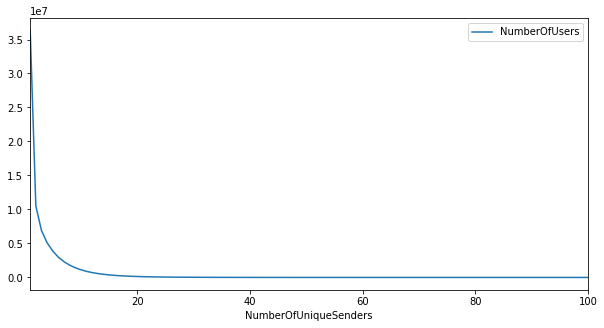

In [117]:
part_of_array = df1[:100]
part_of_array.plot()

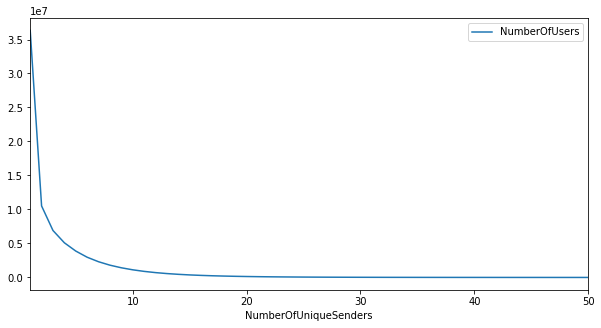

In [118]:
part_of_array = df1[:50]
part_of_array.plot()

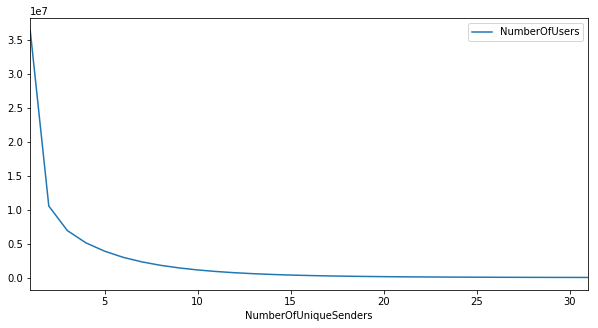

In [119]:
from IPython.html.widgets import *

def pltarray(f):
    part_of_array = df1[:f]
    part_of_array.plot()

interact(pltarray, f=(1,441,10))

# Split file for some range

In [112]:
import pandas as pd
df1 = pd.read_csv("UniqueSender.csv",
                  sep='\t', encoding='latin1')

initial_array = df1.values

In [113]:
# we will split array by numbers of unique senders with some range
# step = 2*(№ of gange)
# 1, [2,2+2*(1)], [2+2*(1)+1,2+2*(1)+1 + 2*(2)], [2+2*(1)+1 + 2*(2) +1, 2+2*(1)+1 + 2*(2) +1 +2*(3), etc]
# 1, [2,4], [5,9], [10, 16], etc
# in python it will be indexed as
# 0, [1,3], [4,8], [9, 15]
initial_array = df1.values

from IPython.display import HTML, display

sorted_array = []
range_of_value = []    
def slitarray():
    range_index = 0
    init_index = 0
    low_index = init_index
    high_index = 0  
    value = 0
    i = 0
    while i < len(initial_array[:,0]) :
        if (i <= high_index):
            value = value + initial_array[i,1]
            i += 1
        if (i > high_index or i == len(initial_array[:,0])):
#             print("[" + str(initial_array[low_index,0]) + "," + str(initial_array[i-1,0]) + "]   ---   [" + str(value) + "]")
            range_of_value.append("[" + str(initial_array[low_index,0]) + "," + str(initial_array[i-1,0]) + "]")
            low_index = i
            sorted_array.append(value)
            value = 0
            range_index = range_index + 1  # index of next range
            high_index = i + 2*range_index # end of range for next part

def repr_html(tbl1, tbl2):
    html = []#["<table width=100%>"]
    html.append("<tr>")
    html.append("<td><b>Range Of Unique Senders</b></td>")
    html.append("<td><b>Number Of Users (summary)</b></td>")
    for i in range(len(tbl1[:])):
        html.append("<tr>")
        html.append("<td>{0}</td>".format(tbl1[i]))
        html.append("<td>{0}</td>".format(tbl2[i]))
        html.append("</tr>")
    html.append("</table>")
    return ''.join(html)
    
slitarray()
display(HTML(repr_html(range_of_value, sorted_array)))


Range Of Unique Senders,Number Of Users (summary)
"[1,1]",36346100
"[2,4]",22527874
"[5,9]",12409466
"[10,16]",4448898
"[17,25]",1179154
"[26,36]",274752
"[37,49]",66400
"[50,64]",18175
"[65,81]",5869
"[82,100]",2221
